# ATP Tennis Data - Symmetric Raw Data


In our feature engineering notebooks, we created a dataset for match where we left categorical columns un-encoded. Player 1 was randomly chosen to be either a winner or loser for the match so that we can have multiple classes to train our models.

We created an alternate dataset, where samples were duplicated and split into 2 samples where each row would have player 1 as a winner and 2nd row would have player 1 as the loser for the same match.

Hypothesis for this notebook is that there shouldn't be any significant difference in our accuracy as duplicating the data adds no new information for our models.

We are going to run this dataset through our models to see what effects this has on model accuracy.

NOTE: Again, we are using raw player stats and we have not encoded our categorical columns

## Results from Gradient Boosting with Raw Player Data
```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```


# Summary of Results

* All models except for KNN did slightly worse (although probably not significant). We have slightly higher recall on losses but we traded off the same amount of recall for win recalls
* Our best accuracy score came from Gradient Boosting again
* Because the difference in accuracy score is small, it is inconclusive whether using data from this method of feature engineering would be effective

```
Model Score: 0.6800472653612424

ROC/AUC Score: 0.680048494074675
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68     14815
         Win       0.68      0.68      0.68     14805

    accuracy                           0.68     29620
   macro avg       0.68      0.68      0.68     29620
weighted avg       0.68      0.68      0.68     29620
```






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, REPORT_FILE, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "raw-sym"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_featuressym.csv'

START_YEAR = 1998
END_YEAR = 2018



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6510465901417961

ROC/AUC Score: 0.6510462312230215
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9661  5154
Win   5182  9623


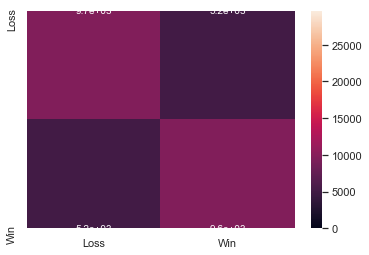

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.5920324105334234

ROC/AUC Score: 0.592031406598299
              precision    recall  f1-score   support

        Loss       0.59      0.60      0.59     14815
         Win       0.59      0.59      0.59     14805

    accuracy                           0.59     29620
   macro avg       0.59      0.59      0.59     29620
weighted avg       0.59      0.59      0.59     29620

      Loss   Win
Loss  8815  6000
Win   6084  8721


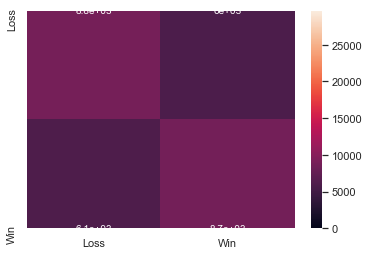

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5965226198514517

ROC/AUC Score: 0.5965231779587558
              precision    recall  f1-score   support

        Loss       0.60      0.59      0.60     14815
         Win       0.60      0.60      0.60     14805

    accuracy                           0.60     29620
   macro avg       0.60      0.60      0.60     29620
weighted avg       0.60      0.60      0.60     29620

      Loss   Win
Loss  8813  6002
Win   5949  8856


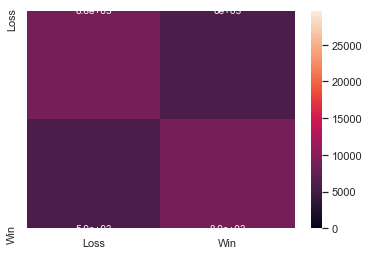

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6441255908170155

ROC/AUC Score: 0.6441026744004605
              precision    recall  f1-score   support

        Loss       0.63      0.71      0.67     14815
         Win       0.67      0.58      0.62     14805

    accuracy                           0.64     29620
   macro avg       0.65      0.64      0.64     29620
weighted avg       0.65      0.64      0.64     29620

       Loss   Win
Loss  10548  4267
Win    6274  8531


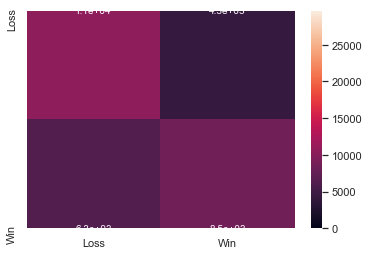

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3664           11.55s
         2           1.3503           11.48s
         3           1.3358           10.98s
         4           1.3236           10.97s
         5           1.3133           10.68s
         6           1.3039           10.48s
         7           1.2963           10.28s
         8           1.2891           10.51s
         9           1.2828           10.32s
        10           1.2775           10.19s
        20           1.2397           10.10s
        30           1.2055            8.30s
        40           1.1913            7.39s
        50           1.1798            5.88s
        60           1.1722            4.72s
        70           1.1680            3.44s
        80           1.1607            2.30s
        90           1.1562            1.13s
       100           1.1511            0.00s


Model Score: 0.6800472653612424

ROC/AUC Score: 0.680048494074675
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68     14815
         Win       0.68      0.68      0.68     14805

    accuracy                           0.68     29620
   macro avg       0.68      0.68      0.68     29620
weighted avg       0.68      0.68      0.68     29620

       Loss    Win
Loss  10021   4794
Win    4683  10122


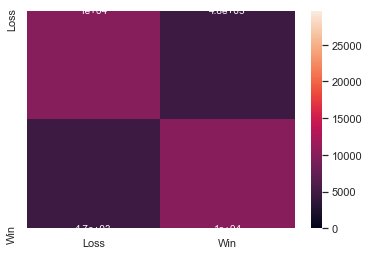

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6615462525320729

ROC/AUC Score: 0.6615423500215366
              precision    recall  f1-score   support

        Loss       0.66      0.67      0.67     14815
         Win       0.67      0.65      0.66     14805

    accuracy                           0.66     29620
   macro avg       0.66      0.66      0.66     29620
weighted avg       0.66      0.66      0.66     29620

      Loss   Win
Loss  9972  4843
Win   5182  9623


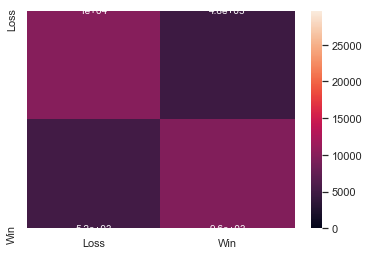

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Summary

Decision Tree Classifier did the best with a 92% accuracy score while KNN did the worst at about 60% (below our null hypothesis)

In [30]:
report = pd.read_csv(ab.report_file)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
18,LogisticRegression,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.651047,0.651046,"{""0"": {""0"": 9661, ""1"": 5182}, ""1"": {""0"": 5154,...","{""Loss"": {""precision"": 0.6508792023175908, ""re...",../models/logisticregression-1998-2018-raw-sym...,0.0,0.0,0.0
19,KNeighborsClassifier,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.592032,0.592031,"{""0"": {""0"": 8815, ""1"": 6084}, ""1"": {""0"": 6000,...","{""Loss"": {""precision"": 0.5916504463386805, ""re...",../models/kneighborsclassifier-1998-2018-raw-s...,0.0,0.0,0.0
20,DecisionTreeClassifier,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.596523,0.596523,"{""0"": {""0"": 8813, ""1"": 5949}, ""1"": {""0"": 6002,...","{""Loss"": {""precision"": 0.597005825768866, ""rec...",../models/decisiontreeclassifier-1998-2018-raw...,0.0,0.0,0.0
21,RandomForestClassifier,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.644126,0.644103,"{""0"": {""0"": 10548, ""1"": 6274}, ""1"": {""0"": 4267...","{""Loss"": {""precision"": 0.6270360242539531, ""re...",../models/randomforestclassifier-1998-2018-raw...,0.0,0.0,0.0
22,GradientBoostingClassifier,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.680047,0.680048,"{""0"": {""0"": 10021, ""1"": 4683}, ""1"": {""0"": 4794...","{""Loss"": {""precision"": 0.6815152339499456, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0
23,AdaBoostClassifier,raw-sym,../datasets/atp_matches_1985-2019_featuressym.csv,1998,2018,0.661546,0.661542,"{""0"": {""0"": 9972, ""1"": 5182}, ""1"": {""0"": 4843,...","{""Loss"": {""precision"": 0.6580440807707536, ""re...",../models/adaboostclassifier-1998-2018-raw-sym...,0.0,0.0,0.0


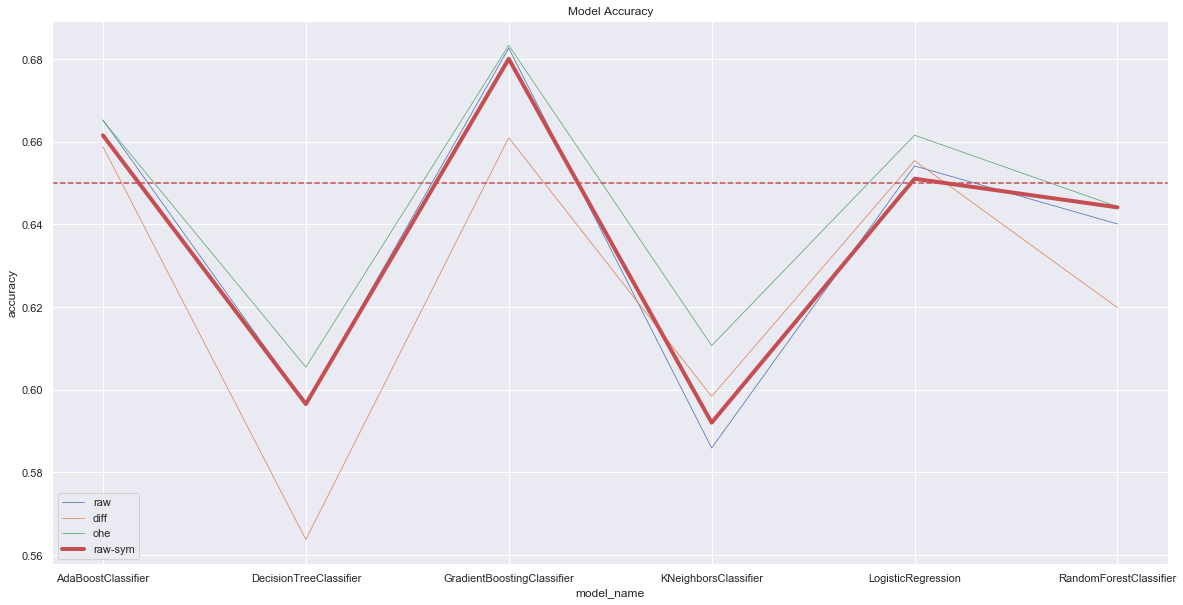

In [31]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [34]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [35]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

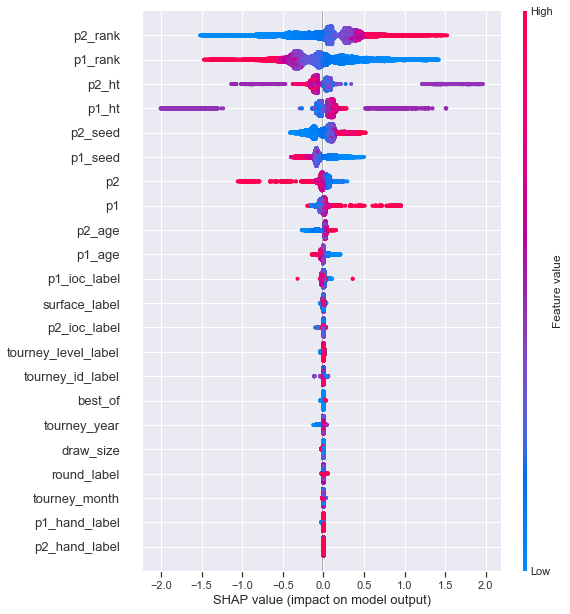

In [36]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [33]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-20 22:24
